# Проверка гипотез

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline

## Task 1
По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

**гипотеза $H_0$:** вероятность, что работник испытыват на работе существенный стрес равна 0.75 ($p$ = 0.75)  
**гипотеза $H_1$:** вероятность отличается от 0.75 $(p \neq 075)$  

Используем следующую статистику: количество успехов в $n$ испытаниях. Успех - работник испытывает стресс. $n = 100$  
Данная статистика имеет биномиальное распределение $T$ — $Bin\left(n, 0.75\right)$.

0.0822

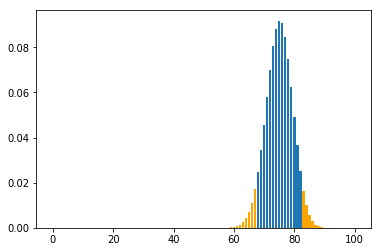

In [3]:
F_H0 = stats.binom(100, 0.75)
plt.bar(range(101), F_H0.pmf(range(101)))
plt.bar(range(68), F_H0.pmf(range(68)), color='orange')
plt.bar(range(83, 101), F_H0.pmf(range(83, 101)), color='orange')
round(stats.binom_test(67, 100, 0.75, 'two-sided'), 4)

## Task 2
The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [4]:
data = pd.read_csv('datasets/pines.txt', sep='\t')
data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [5]:
counts = stats.binned_statistic_2d(data.sn, data.we, values=None, statistic='count', bins=(5, 5)).statistic
counts

/usr/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [6]:
mean = counts.mean()
mean

23.36

## Task 3
Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [7]:
n_trees = counts.sum()
stats.chisquare(counts.flatten(), [n_trees/25]*25, ddof=1)

Power_divergenceResult(statistic=150.58904109589042, pvalue=9.87806178820889e-21)

## Task 4

Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно?

Нулевое распределение статистики — хи-квадрат с $25−1=24$ степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы $K−1$, где $K$ — количество интервалов).

Посчитайте достигаемый уровень значимости.

Если вы используете функцию scipy.stats.chi2.cdf, в качестве значения параметра df нужно взять 24 (это число степеней свободы); если функцию scipy.stats.chisquare — параметр ddof нужно брать равным 0 (это как раз количество параметров теоретического распределения, оцениваемых по выборке).

Отвергается ли гипотеза равномерности на уровне значимости 0.05?

**Ответ:** достигаемый уровень значимости меньше 0.05, гипотеза равномерности отвергается.